In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the API key
from api_keys import alpha_vantage_api_key, bls_api_key, fred_api_key
from fredapi import Fred

In [31]:
# Create a dataFrame for Nasdaq Monthly profit

import yfinance as yf
import pandas as pd
import calendar

stock_data = yf.download('QQQ', start='2014-01-01', end='2019-12-31', progress=False).reset_index()

# Date, Month Column creation by using Date
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month_Number'] = stock_data['Date'].dt.month

# Close price for each Year, Month
monthly_data = stock_data.groupby(['Year', 'Month_Number'])
last_close = monthly_data['Close'].last().reset_index()

# dataFrame creation
monthly_close_df = pd.DataFrame({
                                    'Year': last_close['Year'],
                                    'Month_Number': last_close['Month_Number'],
                                    'Monthly_Close': last_close['Close']
                                })

# Generate month numbers (1-12)
month_numbers = list(range(1, 13))

# Use list comprehension to map month numbers to month names
month_names = [calendar.month_name[month] for month in month_numbers]

# Create the DataFrame
month_df = pd.DataFrame({
                            'Month_Number': month_numbers,
                            'Month': month_names
                        })

# Merge the DataFrames on 'Month' from monthly_profit_df and 'Month Number' from month_df
monthly_close_merge_df = pd.merge(monthly_close_df, month_df, left_on='Month_Number', right_on='Month_Number', how='left')

monthly_close_final_df = monthly_close_merge_df[["Year", "Month", "Monthly_Close"]]
monthly_close_final_df["Year"] = monthly_close_final_df["Year"].astype('str')

monthly_close_final_df

C:\Users\ZZ04DI616\AppData\Local\Temp\ipykernel_27008\1095918194.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_close_final_df["Year"] = monthly_close_final_df["Year"].astype('str')


,Year,Month,Monthly_Close
0,2014,January,86.269997
1,2014,February,90.339996
2,2014,March,87.669998
3,2014,April,87.389999
4,2014,May,91.309998
...,...,...,...
67,2019,August,187.470001
68,2019,September,188.809998
69,2019,October,197.080002
70,2019,November,205.100006


In [38]:
import calendar

# Initialize Fred api key
fred = Fred(api_key=fred_api_key)

# Fetch S&P 500 data from FRED
sp500_data = fred.get_series('SP500', observation_start='2014-01-01', observation_end='2019-12-31')

# Create a DataFrame from the fetched data
sp500_df = pd.DataFrame(sp500_data, columns=['Close'])

# Reset the index to make the date a column and create Year and Month columns
sp500_df.reset_index(inplace=True)
sp500_df.columns = ['Date', 'Close']
sp500_df['Year'] = sp500_df['Date'].dt.year
sp500_df['Month_Number'] = sp500_df['Date'].dt.month

# Calculate last close for each month
monthly_data = sp500_df.groupby(['Year', 'Month_Number'])
last_close = monthly_data['Close'].last().reset_index()

# Create DataFrame for monthly closes
monthly_close_df = pd.DataFrame({
    'Year': last_close['Year'],
    'Month_Number': last_close['Month_Number'],
    'Monthly_Close': last_close['Close']
})

# Generate month numbers (1-12) and names
month_numbers = list(range(1, 13))
month_names = [calendar.month_name[month] for month in month_numbers]

# Create the month DataFrame
month_df = pd.DataFrame({
    'Month_Number': month_numbers,
    'Month': month_names
})

# Merge monthly close data with month names
monthly_close_merge_df = pd.merge(monthly_close_df, month_df, on='Month_Number', how='left')

# Final DataFrame with Year, Month, and Monthly Close
monthly_close_final_df = monthly_close_merge_df[["Year", "Month", "Monthly_Close"]]
monthly_close_final_df["Year"] = monthly_close_final_df["Year"].astype('str')

# Print the DataFrame
monthly_close_final_df


ValueError: Bad Request.  The value for variable api_key is not a 32 character alpha-numeric lower-case string.  Read https://fred.stlouisfed.org/docs/api/api_key.html for more information.

In [39]:
# Initialize the FRED API key
fred = Fred(api_key=fred_api_key)
# data = fred.search('interest rate')

# Fetch data for the Federal Funds Effective Rate
series_id = 'FEDFUNDS'  # Series ID for the Federal Funds Rate
InterestRate_Data = fred.get_series(series_id, observation_start='2014-01-01', observation_end='2019-12-31')

# Convert the series data into a DataFrame
InterestRate_Data_df = pd.DataFrame(InterestRate_Data, columns=['Rate'])
InterestRate_Data_df.reset_index(inplace=True)
InterestRate_Data_df.columns = ['Date', 'Rate']

# Extract 'Year' and 'Month' from 'Date'
InterestRate_Data_df['Year'] = InterestRate_Data_df['Date'].dt.year
InterestRate_Data_df['Month'] = InterestRate_Data_df['Date'].dt.strftime('%B')  # Convert date to month name

# Optionally, rearrange columns if needed
InterestRate_Data_df = InterestRate_Data_df[['Year', 'Month', 'Rate']]

# Convert 'Rate' to float, handle non-numeric issues
InterestRate_Data_df['Rate'] = pd.to_numeric(InterestRate_Data_df['Rate'], errors='coerce')
InterestRate_Data_df["Year"] = InterestRate_Data_df["Year"].astype('str')


InterestRate_Data_df

ValueError: Bad Request.  The value for variable api_key is not a 32 character alpha-numeric lower-case string.  Read https://fred.stlouisfed.org/docs/api/api_key.html for more information.

In [32]:
# Merge two dataFrame (Nasdaq Monthly profit + Monthly Interest Rate)

MonthlyClose_InterestRate_df = pd.merge(monthly_close_final_df, InterestRate_Data_df, on= ["Year","Month"], how="inner")

MonthlyClose_InterestRate_df

,Year,Month,Monthly_Close,Rate
0,2014,January,86.269997,0.07
1,2014,February,90.339996,0.07
2,2014,March,87.669998,0.08
3,2014,April,87.389999,0.09
4,2014,May,91.309998,0.09
...,...,...,...,...
67,2019,August,187.470001,2.13
68,2019,September,188.809998,2.04
69,2019,October,197.080002,1.83
70,2019,November,205.100006,1.55


C:\Users\ZZ04DI616\AppData\Local\Temp\ipykernel_27008\1978939833.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  MonthlyClose_InterestRate_df['Date'] = pd.to_datetime(MonthlyClose_InterestRate_df['Year'].astype(str) + ' ' + MonthlyClose_InterestRate_df['Month'])


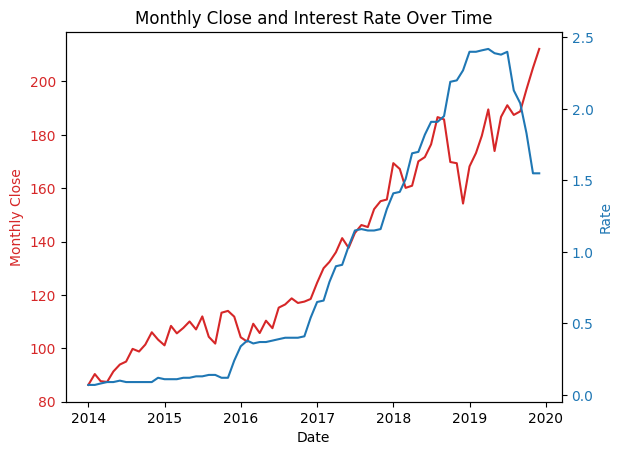

In [34]:
# Combine 'Year' and 'Month' into a 'Date' for plotting
MonthlyClose_InterestRate_df['Date'] = pd.to_datetime(MonthlyClose_InterestRate_df['Year'].astype(str) + ' ' + MonthlyClose_InterestRate_df['Month'])

# Plotting
fig, ax1 = plt.subplots()

# Create first plot - Monthly Close
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Close', color=color)
ax1.plot(MonthlyClose_InterestRate_df['Date'], MonthlyClose_InterestRate_df['Monthly_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the Rate data
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Rate', color=color)  
ax2.plot(MonthlyClose_InterestRate_df['Date'], MonthlyClose_InterestRate_df['Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.title('Monthly Close and Interest Rate Over Time')
plt.show()